In [141]:
import sys
import os

import sys
sys.path.insert(0, os.path.abspath('../../src/'))
sys.path.insert(1, os.path.abspath('../../src/rl/'))
sys.path.insert(2, os.path.abspath('../../src/rl/agents/'))
sys.path.insert(4, os.path.abspath('../../src/rl/agents/base/'))
sys.path.insert(5, os.path.abspath('../../src/rl/environments/'))
sys.path.insert(6, os.path.abspath('../../src/rl/environments/base'))
sys.path.insert(7, os.path.abspath('../../src/rl/harnesses/'))
sys.path.insert(8, os.path.abspath('../../src/rl/agents/tabular/'))
sys.path.insert(2, os.path.abspath('../../src/mpt/efficient_frontier/'))
sys.path.insert(3, os.path.abspath('../../src/mpt/utils'))

In [406]:
import importlib
importlib.reload(sys.modules['RandomTrader'])
importlib.reload(sys.modules['GenerativeMarketEnv'])
importlib.reload(sys.modules['SimHarness'])
importlib.reload(sys.modules['TabularTrader'])
importlib.reload(sys.modules['AgentArgs'])

<module 'AgentArgs' from '/Users/michael/UCL/Disertation/porfolio-optimisation/src/rl/agents/base/AgentArgs.py'>

In [407]:
from RandomTrader import RandomTrader
from GenerativeMarketEnv import GenerativeMarketEnv
from SimHarness import SimHarness
from TabularTrader import TabularTrader
from AgentArgs import AgentArgs


import numpy as np
import itertools
import matplotlib.pyplot as plt


plt.style.use(['science', 'retro', 'grid'])

## Calculating Weights

In [288]:
def calculate_valid_weights(num_assets, num_increments):
    ws = []
    for n in range(num_assets):
        ws.append(np.linspace(0, 1, num_increments))
    ws = list(itertools.product(*ws))
    return list(filter(lambda a: sum(a) == 1, ws))

In [4]:
ws = calculate_valid_weights(3, 5)

## How do the number of weights vary with increment size

In [5]:
possibilities_inc = [] 
for incr in range(2, 60):
    ws = calculate_valid_weights(3, incr)
    tot = len(ws)
    possibilities_inc.append(tot)

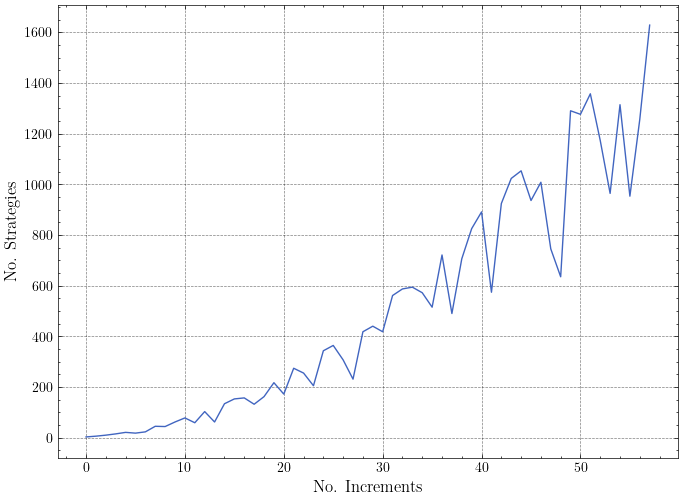

In [13]:
plt.figure(figsize=(8, 6), dpi=100)
plt.xlabel('No. Increments', size=12)
plt.ylabel('No. Strategies', size=12)
plt.plot(np.arange(58), possibilities_inc)
plt.savefig('./vary_increments')

In [ ]:
possibilities_stocks = [] 
for stocks in range(2, 12):
    ws = calculate_valid_weights(stocks, 5)
    tot = len(ws)
    possibilities_stocks.append(tot)

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)
plt.xlabel('No. Stocks', size=12)
plt.ylabel('No. Strategies', size=12)
plt.plot(np.arange(10), possibilities_stocks)
plt.savefig('./vary_stocks')

## Two Assets

In [504]:
# create a generitive market that produces returns on two assets
μ = [1, 8]
Σ = [[0.2, 0], [0, 0.4]]
market = GenerativeMarketEnv(μ, Σ)

In [505]:
regrets = []

for i in range(10):
    args = AgentArgs(ϵ=lambda t: 2./t, n_assets= 2, n_inc=5)
    trader = TabularTrader(args)
    harness = SimHarness(market, trader)
    harness.train(2000)
    regrets.append(harness.regrets)

In [506]:
cum_regs = np.cumsum(regrets, axis=1)
mean = np.mean(cum_regs, axis=0)
std = np.std(cum_regs, axis=0)

In [510]:
cum_regs.shape

(10, 2000)

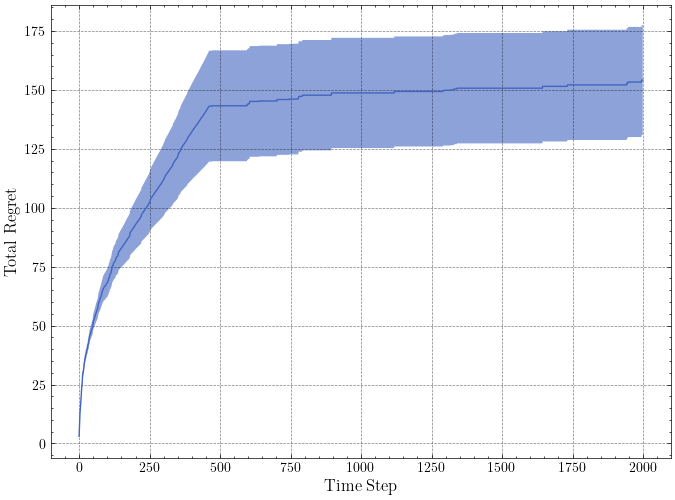

In [508]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(mean)
plt.fill_between(np.arange(mean.shape[0]), mean - 0.1*std, mean + 0.1*std, alpha=0.6)
plt.xlabel('Time Step', size=12)
plt.ylabel('Total Regret', size=12)
plt.savefig('tab_2ii')

In [301]:
# create a harness to run the simulation
harness = SimHarness(market, trader)

In [302]:
harness.train(1000)

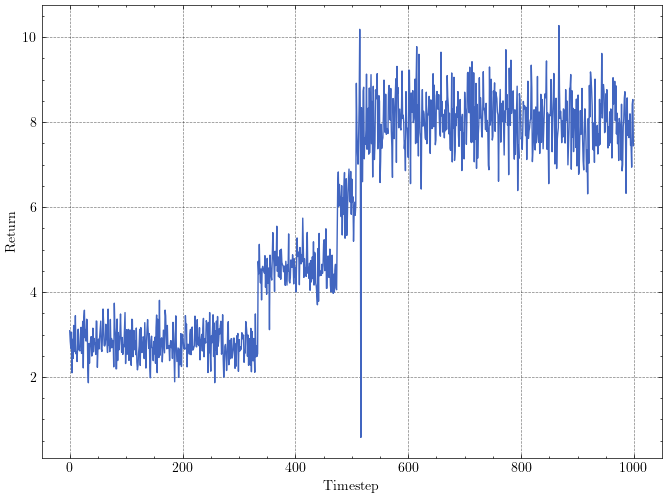

In [303]:
harness.plot_training_results()

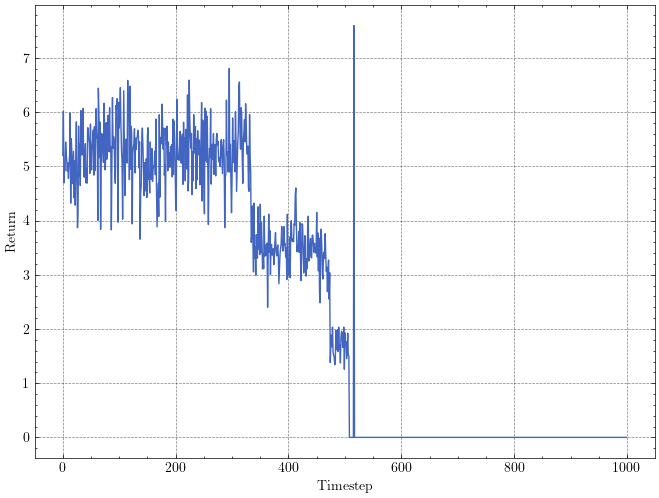

In [304]:
harness.plot_training_regret()

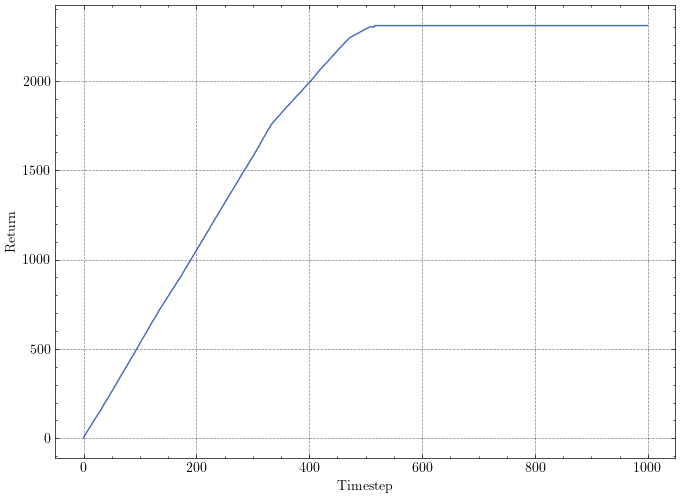

In [305]:
harness.plot_cum_regret()

In [251]:
trader.Q

array([7.97265219, 4.59216256, 2.31983948, 0.        , 0.95192645])

In [214]:
trader.actions

[(0.0, 1.0), (0.25, 0.75), (0.5, 0.5), (0.75, 0.25), (1.0, 0.0)]

# Ten Assets

In [466]:
# create a generitive market that produces returns on two assets
μ = [1, 8, 8.5, 7.5, 0.4, 8.3, 7.9, 8.9, 4.1, 2.2]
Σ = [
    [0.4, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0.5, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0.1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0.2, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0.1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0.3, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0.7, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0.5, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0.7, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0.6]
    ]
market = GenerativeMarketEnv(μ, Σ)

In [319]:
args = AgentArgs(ϵ=lambda t: 1./t, n_assets= 10, n_inc=5)
# args = AgentArgs(ϵ=lambda t: 0.1, n_assets= 10, n_inc=5)
trader = TabularTrader(args)
# create a harness to run the simulation
harness = SimHarness(market, trader)

In [320]:
harness.train(1000)

In [321]:
market.best_r

8.9

In [467]:
regrets = []

for i in range(10):
    args = AgentArgs(ϵ=lambda t: 1./t, n_assets= 10, n_inc=5)
    trader = TabularTrader(args)
    harness = SimHarness(market, trader)
    harness.train(2000)
    regrets.append(harness.regrets)

In [469]:
cum_regs = np.cumsum(regrets, axis=1)
mean = np.mean(cum_regs, axis=0)
std = np.std(cum_regs, axis=0)

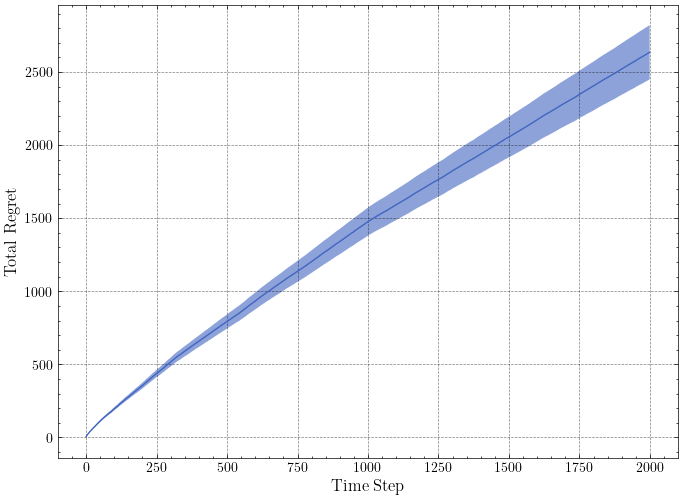

In [473]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(mean)
plt.fill_between(np.arange(mean.shape[0]), mean - 0.1*std, mean + 0.1*std, alpha=0.6)
plt.xlabel('Time Step', size=12)
plt.ylabel('Total Regret', size=12)
plt.savefig('tab_10')

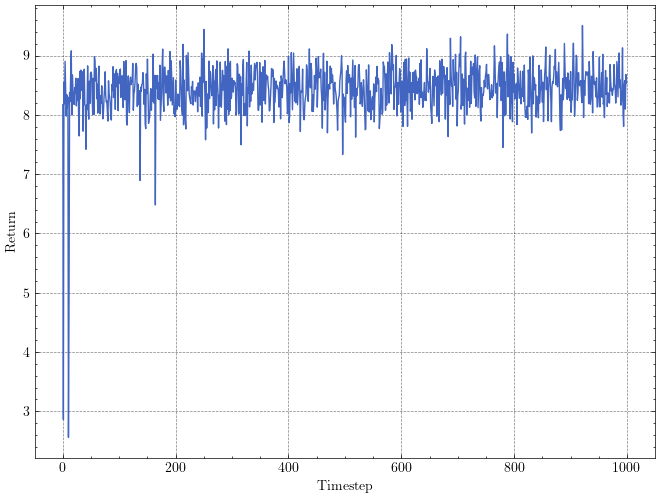

In [322]:
harness.plot_training_results()

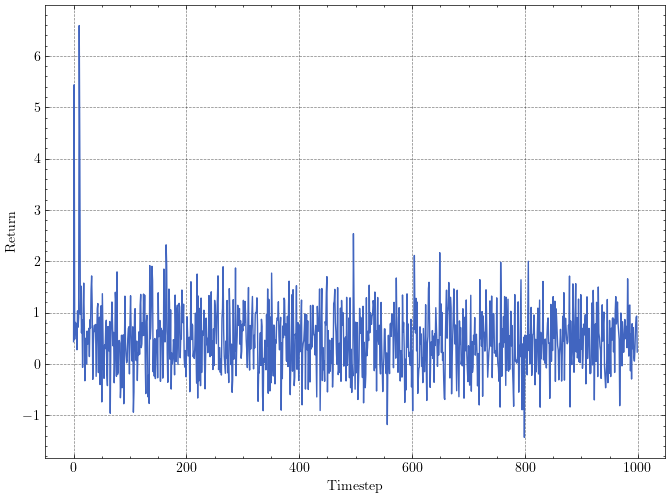

In [323]:
harness.plot_training_regret()

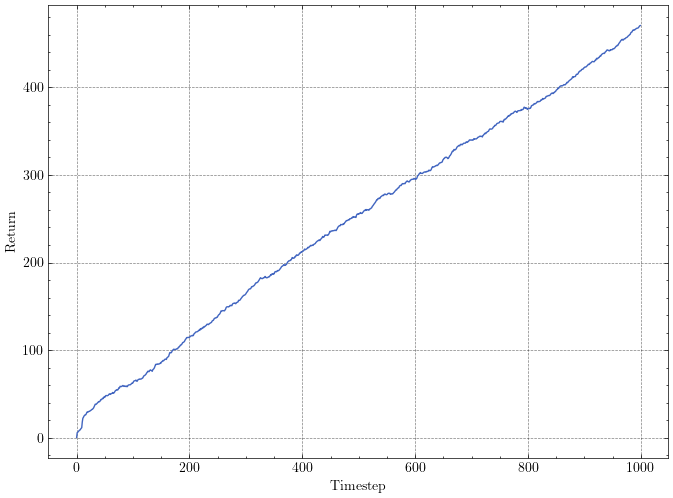

In [324]:
harness.plot_cum_regret()

In [325]:
import numpy as np
np.argmax(trader.Q)

302

In [327]:
trader.actions[302]

(0.0, 0.0, 0.5, 0.0, 0.0, 0.0, 0.25, 0.25, 0.0, 0.0)

In [93]:
import numpy as np

In [94]:
np.cumsum([1,2,3])

array([1, 3, 6])